# IMPORTING NECESSARY LIBRARIES

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

# IMPORTING DATASET

In [25]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country', 'income']

train = pd.read_csv('adult(data).csv', names = column_names)
test = pd.read_csv('adult(test).csv', names = column_names, skiprows = 1)

df = pd.concat([test,train])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'income']

for column in columns:
    print(column,':', df[column].unique(), '\n')

workclass : [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool'] 

marital-status : [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse'] 

occupation : [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces'] 

relationship : [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative'] 

race : [' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo'] 

sex : [' Male' ' Female'] 

native-country : [' United-States'

# DATA STATISTICS 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [28]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [29]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country', 'income']

for column in col_names:
    print(column, '\n',df[column].value_counts(),'\n')

age 
 36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

workclass 
  Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64 

fnlwgt 
 203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64 

education 
  HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th          

In [31]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


# DATA PREPROCESSING

## 'INCOME' COLUMN OPERATION 

In [32]:
df.replace({'income':{' <=50K.': '<=50K', 
                      ' >50K.': '>50K', 
                      ' >50K': '>50K', 
                      ' <=50K': '<=50K'}}, inplace = True)

df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

## DROPPING DUPLICATES

In [33]:
df.drop_duplicates(keep = 'last', inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# VISUALIZATION

## GENDER vs INCOME

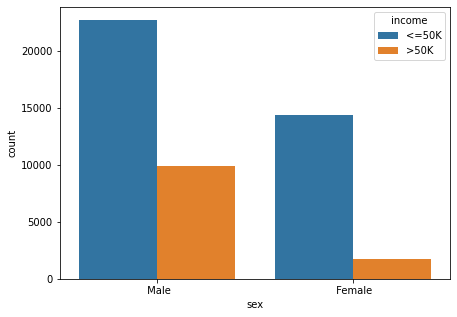

In [34]:
plt.subplots(figsize=(7,5))
sns.countplot(x='sex', hue='income',  data=df)

## WORKCLASS vs INCOME

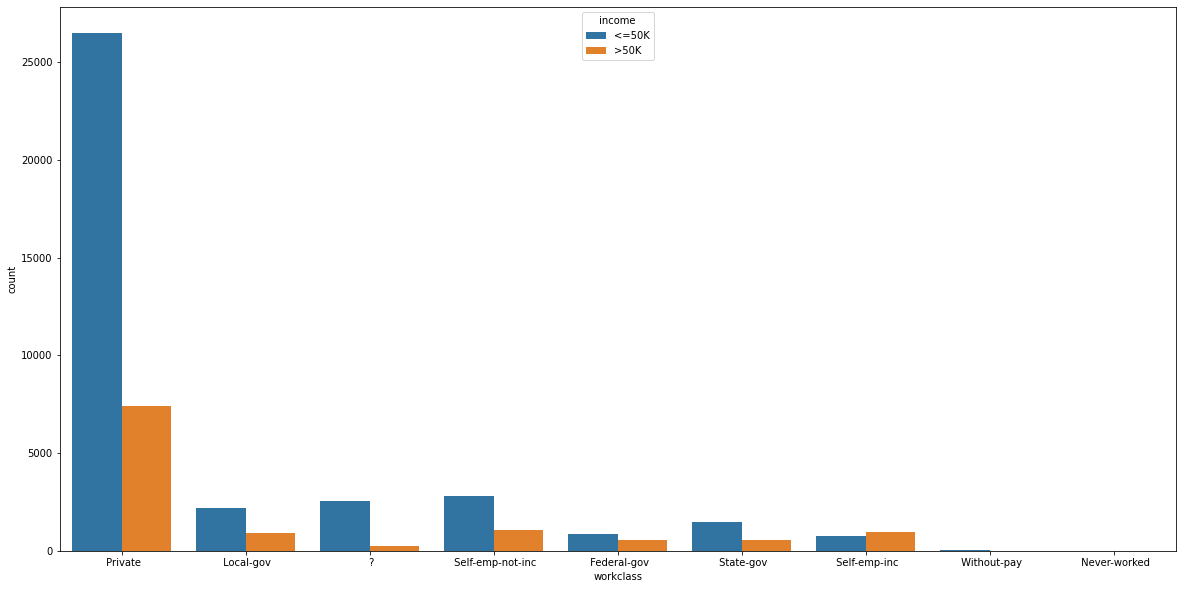

In [35]:
plt.subplots(figsize=(20,10))
sns.countplot(x='workclass', hue='income',  data=df)

## EDUCATION vs INCOME

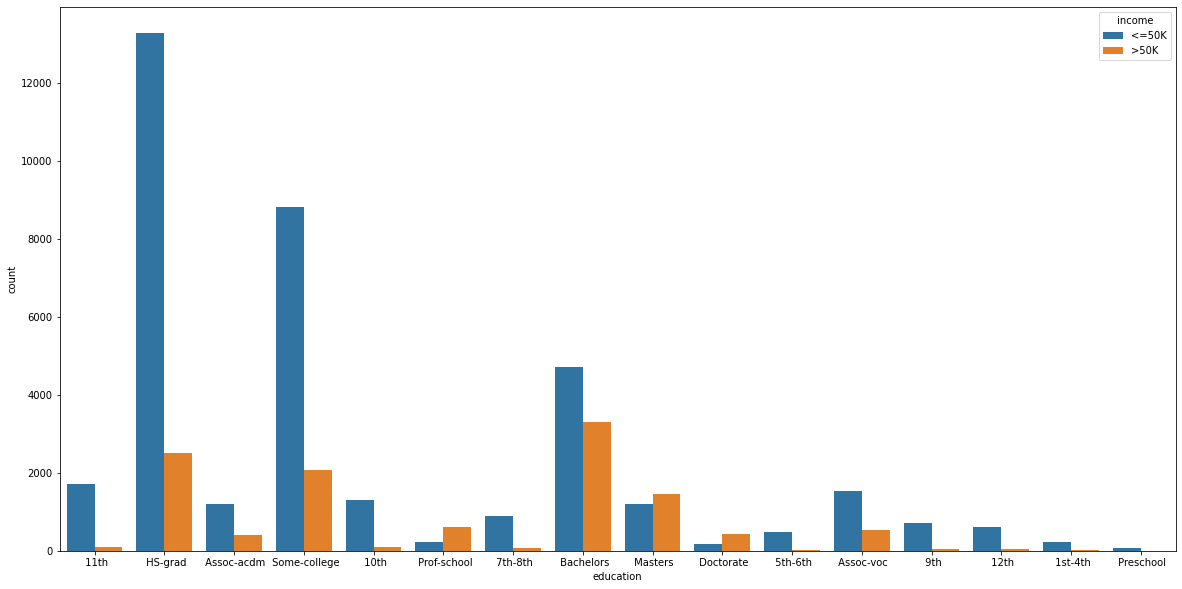

In [36]:
plt.subplots(figsize=(20,10))
sns.countplot(x='education', hue='income',  data=df)

## OCCUPATION vs INCOME

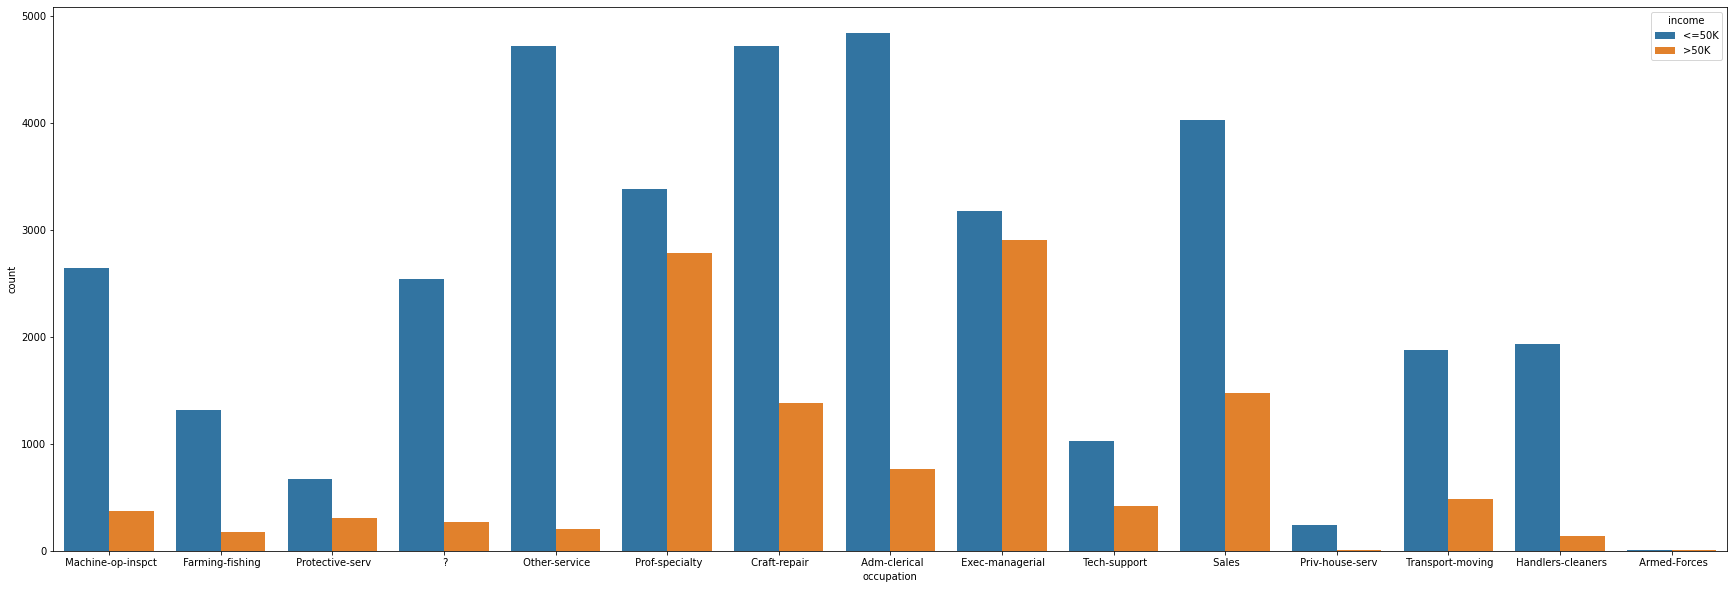

In [37]:
plt.subplots(figsize=(30,10))
sns.countplot(x='occupation', hue='income',  data=df)

## RACE vs INCOME

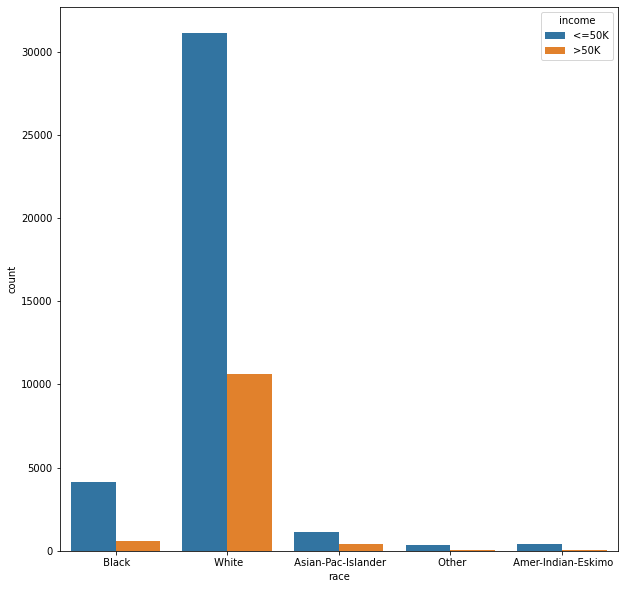

In [38]:
plt.subplots(figsize=(10,10))
sns.countplot(x='race', hue='income',  data=df)

## NATIVE-COUNTRY vs INCOME

In [39]:
#world_map

## HEATMAP

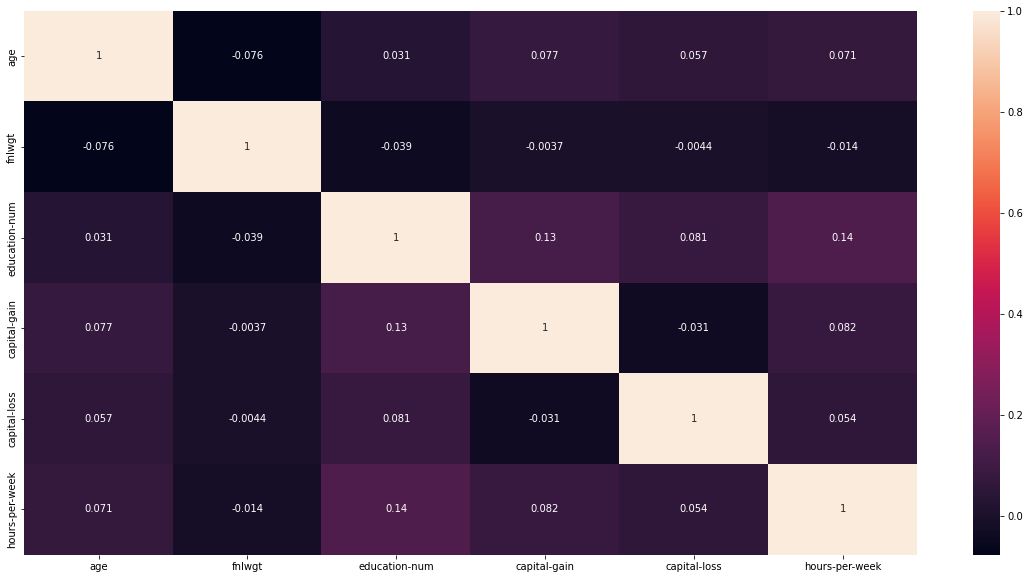

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()
plt.close()

# LABEL ENCODING

In [41]:
label_encoder = preprocessing.LabelEncoder()

columns = ['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country']

for column in columns:
    df[column]= label_encoder.fit_transform(df[column])
    
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,19329,1,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,4,4212,11,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,25340,7,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,11201,15,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,5411,15,10,4,0,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,21582,7,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,4,10584,11,9,2,7,0,4,1,0,0,40,39,>50K
32558,58,4,10316,11,9,6,1,4,4,0,0,0,40,39,<=50K
32559,22,4,16813,11,9,4,1,3,4,1,0,0,20,39,<=50K


# FEATURE SELECTION

In [42]:
scaler = StandardScaler()
features = df.drop(['income', 'fnlwgt', 'relationship'],axis = 1)
target = df['income']
scaled_data = scaler.fit_transform(features)

# TRAIN-TEST SPLIT

In [43]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size = 0.2, random_state = 42)
#training_features, test_features, training_target, test_target = train_test_split(scaled_data, target, test_size = 0.2, random_state = 42)

# MODEL BUILDING

## DECISION TREE

In [44]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)

dt_train_pred = dt_model.predict(x_train)
dt_test_pred = dt_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, dt_train_pred)}')
print(f'Test score: {accuracy_score(y_test, dt_test_pred)}')

Train score: 0.8443328550932568
Test score: 0.8465874154539865


## RANDOM FOREST

In [45]:
clf = RandomForestClassifier(n_estimators = 500, max_depth=5, random_state = 42)
clf.fit(x_train, y_train)

rf_train_pred = clf.predict(x_train)
rf_test_pred = clf.predict(x_test)

print(f'Train score: {accuracy_score(y_train, rf_train_pred)}')
print(f'Test score: {accuracy_score(y_test, rf_test_pred)}')

Train score: 0.8490213158434106
Test score: 0.8519163763066202


## SUPPORT VECTOR MACHINE

In [46]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train, y_train)

svm_train_pred = svm_model.predict(x_train)
svm_test_pred = svm_model.predict(x_test)

print(accuracy_score(y_train, svm_train_pred))
print(accuracy_score(y_test, svm_test_pred))

0.811667349866776
0.817278130764501


## LOGISTIC REGRESSION

In [47]:
lm = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
lm.fit(x_train, y_train)

lm_train_pred = lm.predict(x_train)
lm_test_pred = lm.predict(x_test)

print(accuracy_score(y_train, lm_train_pred))
print(accuracy_score(y_test, lm_test_pred))

0.821249231399877
0.8254765320762452


## k NEAREST NEIGHBOUR

In [48]:
k_range = range(1, 11)
train_score, test_score = [], []

for val in k_range:
    knn = KNeighborsClassifier(n_neighbors= val)
    knn.fit(x_train, y_train)
    knn_train_pred = knn.predict(x_train)
    knn_test_pred = knn.predict(x_test)
    train_score.append(accuracy_score(y_train, knn_train_pred))
    test_score.append(accuracy_score(y_test, knn_test_pred))
    
print(f'Train Score: {max(train_score)}')
print(f'Test Score: {max(test_score)}')

Train Score: 0.9684873949579832
Test Score: 0.8410534945685592


#PCA

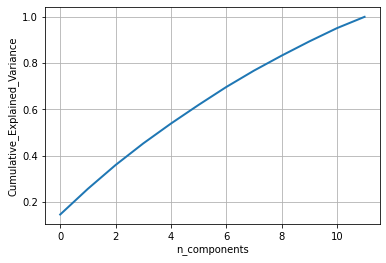

In [52]:
from sklearn import decomposition
pca = decomposition.PCA()
#pca.n_components = 2
#pca_data = pca.fit_transform(stand_data)
#pca_data.shape

pca.n_components = 12
pca_data = pca.fit_transform(scaled_data)
per_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(per_var_explained)
plt.figure(1,figsize =(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Explained_Variance')
plt.show()

In [50]:
pca.n_components = 12
pca_data = pca.fit_transform(scaled_data)
pca_data.shape

(48790, 12)

In [51]:
x_trainp, x_testp, y_trainp, y_testp = train_test_split(pca_data, target, test_size = 0.2, random_state = 42)
#dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_trainp, y_trainp)

dt_train_predp = dt_model.predict(x_trainp)
dt_test_predp = dt_model.predict(x_testp)

print(f'Train score: {accuracy_score(y_trainp, dt_train_pred)}')
print(f'Test score: {accuracy_score(y_testp, dt_test_pred)}')

Train score: 0.8443328550932568
Test score: 0.8465874154539865


# ANALYSIS